#Task 5 - CREDIT CARD FRAUD DETECTION

# Exploring the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Flatten, Dense, Dropout, BatchNormalization

In [2]:
data = pd.read_csv('creditcard.csv')
data.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [3]:
data.tail(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3958,3584,1.099654,-0.647052,0.681912,0.394151,-0.847596,0.441221,-0.759062,0.213579,-1.013359,...,-0.142689,-0.074604,-0.073410,-0.339190,0.298772,-0.274682,0.066962,0.033603,83.00,0.0
3959,3585,-0.456682,0.916441,1.251241,0.047662,0.230838,-0.595781,0.514008,0.120227,-0.266849,...,-0.236612,-0.648139,0.046800,-0.000213,-0.256359,0.104312,0.252726,0.095214,4.49,0.0
3960,3586,0.523975,1.829977,-1.789324,1.557990,0.891425,-1.681729,0.863395,-0.151950,-0.464498,...,-0.109519,-0.020443,0.101674,0.191156,-0.459512,-0.427378,0.361496,0.067407,1.79,0.0
3961,3589,1.131641,-0.113466,1.161534,1.153067,-0.790212,0.305946,-0.689341,0.275891,0.699031,...,-0.035310,0.054183,-0.054211,0.005663,0.418439,-0.405431,0.066176,0.024308,9.99,0.0
3962,3593,-1.415249,0.761709,2.092978,0.053672,-0.077621,1.985255,-1.093342,-2.378442,0.648919,...,-1.599571,-0.054824,-0.243945,-0.993574,0.321685,0.334487,-0.364029,-0.150066,23.41,0.0
3963,3600,-1.208764,-0.096625,1.878917,-3.389588,-0.762071,-1.013864,0.797773,-0.532229,3.693687,...,0.015895,0.744443,-0.258638,0.363714,0.228621,-1.076380,-0.353821,-0.066396,109.89,0.0
3964,3606,-0.939105,1.364749,1.281192,1.344473,0.043464,0.352401,0.156647,0.448243,1.053165,...,-0.191588,0.105092,-0.154254,-0.046558,-0.135903,-0.297644,0.225247,-0.057869,5.67,0.0
3965,3606,1.132333,0.375797,0.795819,1.782844,-0.469843,-0.888277,0.151506,-0.323780,1.412836,...,-0.222050,-0.199991,-0.043587,0.889164,0.662143,-0.418645,-0.001089,0.023872,29.90,0.0
3966,3609,-0.395749,1.008248,1.282035,0.526221,0.860241,0.317118,0.614105,0.148117,0.340621,...,0.003495,0.274933,-0.170922,-0.348009,0.089969,-0.395030,0.029508,0.000014,3.55,0.0
3967,3610,0.816969,-0.280175,1.354064,2.859548,-0.792255,0.723782,-0.662957,0.298866,1.372479,...,-0.133302,-0.433181,-0.111095,-0.108651,0.181549,-0.089374,-0.026460,0.038635,150.91,0.0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,...,3973.000000,3973.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,1638.724138,-0.333723,0.308691,0.837062,0.013144,-0.029177,0.052836,0.146895,-0.071352,0.055778,...,0.010465,-0.082885,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1016.577498,1.351976,1.180436,0.981057,1.418751,1.207632,1.286610,1.090769,1.294647,0.919087,...,0.855829,0.635482,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,750.000000,-1.030747,-0.155734,0.287224,-0.908469,-0.573740,-0.735876,-0.278697,-0.205430,-0.473894,...,-0.211812,-0.512434,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,1526.000000,-0.451819,0.409641,0.884503,0.099497,-0.089809,-0.209577,0.162196,0.028639,0.032286,...,-0.053234,-0.064435,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,2526.000000,1.070572,0.921588,1.433851,0.982710,0.396675,0.449217,0.635055,0.298866,0.622704,...,0.102520,0.345346,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,3624.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

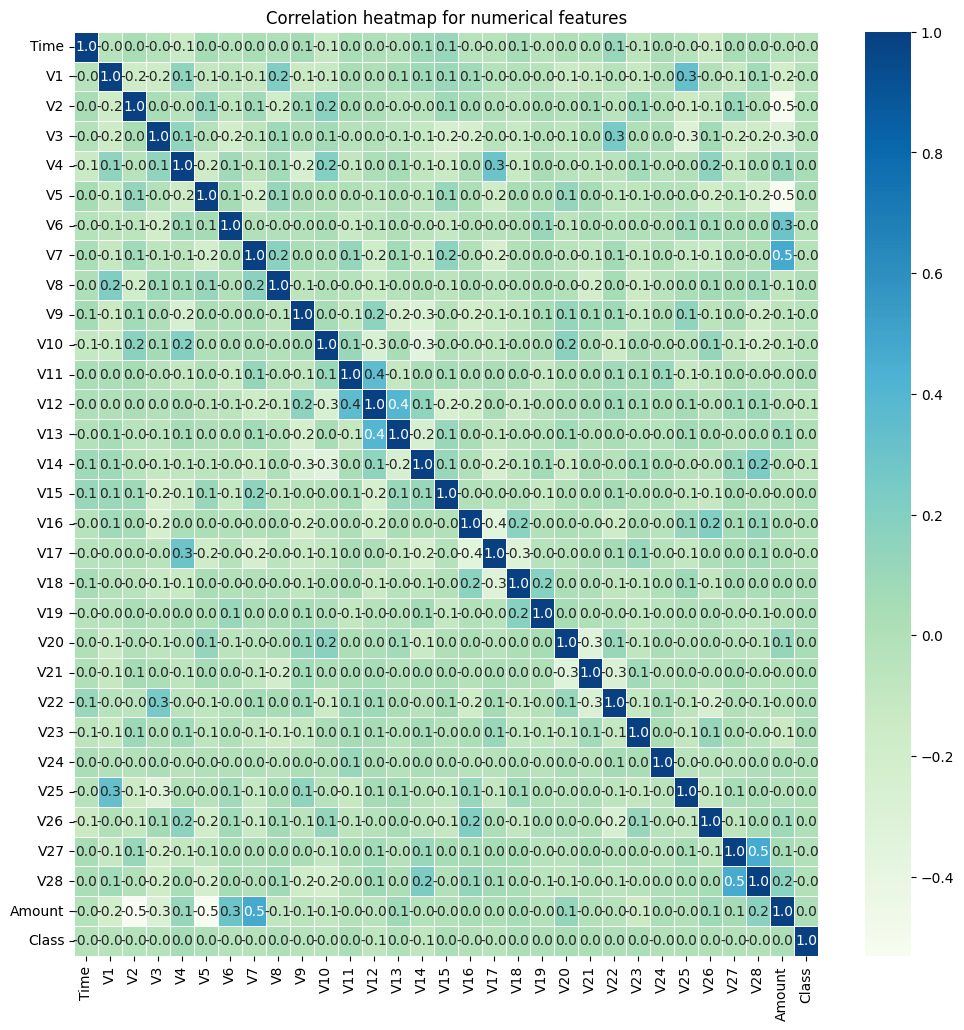

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data.select_dtypes(include=['int64', 'float64']).corr(), annot=True , cmap='GnBu' , fmt='.1f' , linewidth=.6)
plt.title('Correlation heatmap for numerical features')
plt.show()

In [7]:
data['Class'].value_counts()

Class
0.0    3970
1.0       2
Name: count, dtype: int64

In [8]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1638.828463,-0.332459,0.308935,0.837446,0.011432,-0.029468,0.053530,0.147357,-0.071642,0.056211,...,0.059567,0.010282,-0.082957,-0.058743,0.029114,0.095244,-0.012637,0.044658,0.002668,64.899597
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


In [9]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [10]:
print(legit)

      Time        V1        V2        V3        V4        V5        V6  \
0        0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2        1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3        1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4        2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...    ...       ...       ...       ...       ...       ...       ...   
3967  3610  0.816969 -0.280175  1.354064  2.859548 -0.792255  0.723782   
3968  3617  1.134592  0.252051  0.488592  0.799826 -0.264819 -0.369918   
3969  3621 -1.338671  1.080974  1.291196  0.719258  0.101320  0.053896   
3970  3622 -0.339728 -2.417449  0.975517  2.537995 -1.720361  0.863005   
3971  3623 -0.368639  0.947432  1.707755  0.932092  0.292956  0.189100   

            V7        V8        V9  ...       V21       V22       V23  \
0     0.239599  0.098698  0.363787  ..

In [11]:
print(fraud)

     Time        V1        V2        V3        V4        V5        V6  \
541   406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623   472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   

           V7        V8        V9  ...       V21       V22       V23  \
541 -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623  0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   

          V24       V25       V26       V27       V28  Amount  Class  
541  0.320198  0.044519  0.177840  0.261145 -0.143276     0.0    1.0  
623 -0.293803  0.279798 -0.145362 -0.252773  0.035764   529.0    1.0  

[2 rows x 31 columns]


In [12]:
legit_sample =  legit.sample(n=800)
new_data = pd.concat([legit_sample, fraud] , axis=0)
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
322,236,-1.169087,1.096292,0.669688,1.052534,0.422465,0.703450,0.039273,0.672068,-0.457399,...,-0.010604,0.224395,0.001345,-0.807532,0.035781,-0.198104,0.091107,0.075884,0.99,0.0
846,646,1.042004,-0.905564,0.271573,-0.226902,-0.299177,1.414216,-0.793353,0.476655,1.190420,...,-0.214919,-0.636974,-0.198086,-1.644056,0.193481,1.053445,-0.049467,-0.000293,114.34,0.0
3347,2896,-2.492362,1.466422,1.245058,3.149241,-2.069769,1.260684,-0.489723,1.545643,-0.954816,...,0.017919,0.086688,-0.156986,0.115427,0.059958,0.285249,0.163548,-0.144718,204.52,0.0
3771,3271,-2.843698,1.554155,1.311020,-3.187124,0.187408,0.149119,1.490769,-2.150566,2.200120,...,-0.845886,-1.303927,0.050361,-0.380076,-0.833813,0.454801,-3.256365,-1.374070,17.00,0.0
720,544,1.183728,0.143447,0.238718,1.316873,-0.030196,0.012157,0.022382,0.042439,0.409277,...,-0.130755,-0.175158,-0.101670,-0.282291,0.689079,-0.288746,0.034764,0.011592,11.46,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,2794,-0.275176,0.474935,1.963104,1.296268,-0.074516,1.087250,0.114830,0.254601,0.422397,...,-0.035664,0.299172,-0.266704,-0.311700,0.000959,-0.177864,-0.183591,-0.208425,15.00,0.0
481,354,1.135629,-0.173986,0.730692,0.711558,-0.854209,-0.494951,-0.296620,0.110536,0.490269,...,-0.243930,-0.682700,0.096611,0.519267,0.201128,0.259544,-0.039581,0.007195,23.88,0.0
1992,1530,-2.281604,2.311501,-0.039098,-1.020338,-0.443675,-0.579518,0.040473,0.870113,0.567821,...,-0.304800,-0.607748,-0.025686,-0.427980,0.224857,0.369988,0.580846,0.351721,5.00,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0


In [13]:
new_data['Class'].value_counts()

Class
0.0    800
1.0      2
Name: count, dtype: int64

In [14]:
X = new_data.drop(columns='Class', axis=1)
Y = new_data['Class']

In [15]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
322,236,-1.169087,1.096292,0.669688,1.052534,0.422465,0.703450,0.039273,0.672068,-0.457399,...,-0.115601,-0.010604,0.224395,0.001345,-0.807532,0.035781,-0.198104,0.091107,0.075884,0.99
846,646,1.042004,-0.905564,0.271573,-0.226902,-0.299177,1.414216,-0.793353,0.476655,1.190420,...,0.112996,-0.214919,-0.636974,-0.198086,-1.644056,0.193481,1.053445,-0.049467,-0.000293,114.34
3347,2896,-2.492362,1.466422,1.245058,3.149241,-2.069769,1.260684,-0.489723,1.545643,-0.954816,...,-0.031416,0.017919,0.086688,-0.156986,0.115427,0.059958,0.285249,0.163548,-0.144718,204.52
3771,3271,-2.843698,1.554155,1.311020,-3.187124,0.187408,0.149119,1.490769,-2.150566,2.200120,...,0.526653,-0.845886,-1.303927,0.050361,-0.380076,-0.833813,0.454801,-3.256365,-1.374070,17.00
720,544,1.183728,0.143447,0.238718,1.316873,-0.030196,0.012157,0.022382,0.042439,0.409277,...,-0.212156,-0.130755,-0.175158,-0.101670,-0.282291,0.689079,-0.288746,0.034764,0.011592,11.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,2794,-0.275176,0.474935,1.963104,1.296268,-0.074516,1.087250,0.114830,0.254601,0.422397,...,-0.057451,-0.035664,0.299172,-0.266704,-0.311700,0.000959,-0.177864,-0.183591,-0.208425,15.00
481,354,1.135629,-0.173986,0.730692,0.711558,-0.854209,-0.494951,-0.296620,0.110536,0.490269,...,-0.166508,-0.243930,-0.682700,0.096611,0.519267,0.201128,0.259544,-0.039581,0.007195,23.88
1992,1530,-2.281604,2.311501,-0.039098,-1.020338,-0.443675,-0.579518,0.040473,0.870113,0.567821,...,0.509899,-0.304800,-0.607748,-0.025686,-0.427980,0.224857,0.369988,0.580846,0.351721,5.00
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00


In [16]:
Y

322     0.0
846     0.0
3347    0.0
3771    0.0
720     0.0
       ... 
3223    0.0
481     0.0
1992    0.0
541     1.0
623     1.0
Name: Class, Length: 802, dtype: float64

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(802, 30) (641, 30) (161, 30)


# LogisticRegression Model

In [19]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [21]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [22]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [23]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  1.0


# CNN Model

In [24]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [25]:
y_train = Y_train.to_numpy()
y_test = Y_test.to_numpy()

In [26]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [28]:
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape = X_train[0].shape))# X_train[0].shape --> (30,1)
model.add(Dropout(0.2))
model.add(Conv1D(32, 2, activation='relu'))
model.add(Conv1D(16, 2, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 29, 64)            192       
                                                                 
 dropout_2 (Dropout)         (None, 29, 64)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 28, 32)            4128      
                                                                 
 conv1d_5 (Conv1D)           (None, 27, 16)            1040      
                                                                 
 dropout_3 (Dropout)         (None, 27, 16)            0         
                                                                 
 flatten (Flatten)           (None, 432)               0         
                                                                 
 dense (Dense)               (None, 32)               

In [30]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/30
21/21 [==============================] - 2s 28ms/step - loss: 0.4319 - accuracy: 0.9111 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 2/30
21/21 [==============================] - 0s 13ms/step - loss: 0.0593 - accuracy: 0.9969 - val_loss: 1.0059e-04 - val_accuracy: 1.0000
Epoch 3/30
21/21 [==============================] - 0s 11ms/step - loss: 0.0595 - accuracy: 0.9969 - val_loss: 6.9405e-04 - val_accuracy: 1.0000
Epoch 4/30
21/21 [==============================] - 0s 12ms/step - loss: 0.0627 - accuracy: 0.9969 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 5/30
21/21 [==============================] - 0s 12ms/step - loss: 0.0243 - accuracy: 0.9969 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/30
21/21 [==============================] - 0s 10ms/step - loss: 0.0324 - accuracy: 0.9969 - val_loss: 8.1522e-04 - val_accuracy: 1.0000
Epoch 7/30
21/21 [==============================] - 0s 11ms/step - loss: 0.0316 - accuracy: 0.9969 - val_loss: 0.0015 - val_accuracy: 1.0000
E

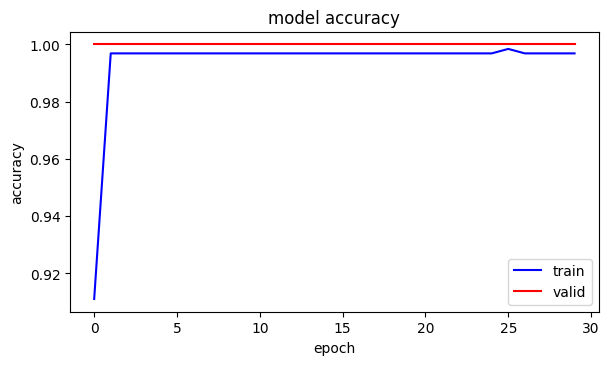

In [32]:
plt.figure(1, figsize = (15,8))
plt.subplot(221)
plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

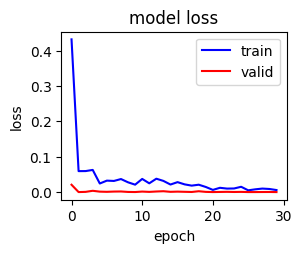

In [33]:
plt.subplot(222)
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()